<a href="https://colab.research.google.com/github/IML666/IML-2023/blob/main/TutorialNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today!

# 0. Link to this file 
(File->Save a copy): http://bit.ly/42Whwdi
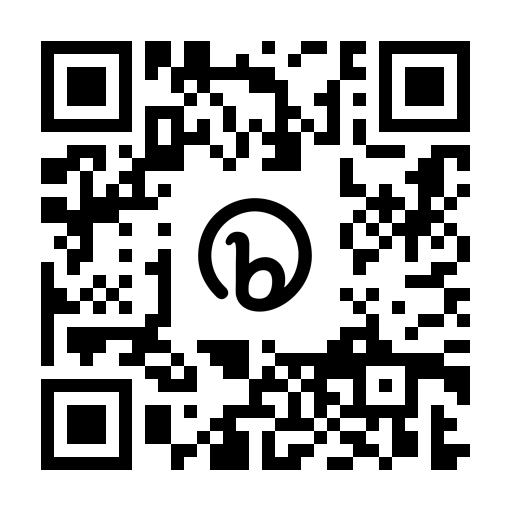

# 1. Build a working Neural Network using Keras/Tensorflow!

# 2. Binary Classification

# 3. Regression







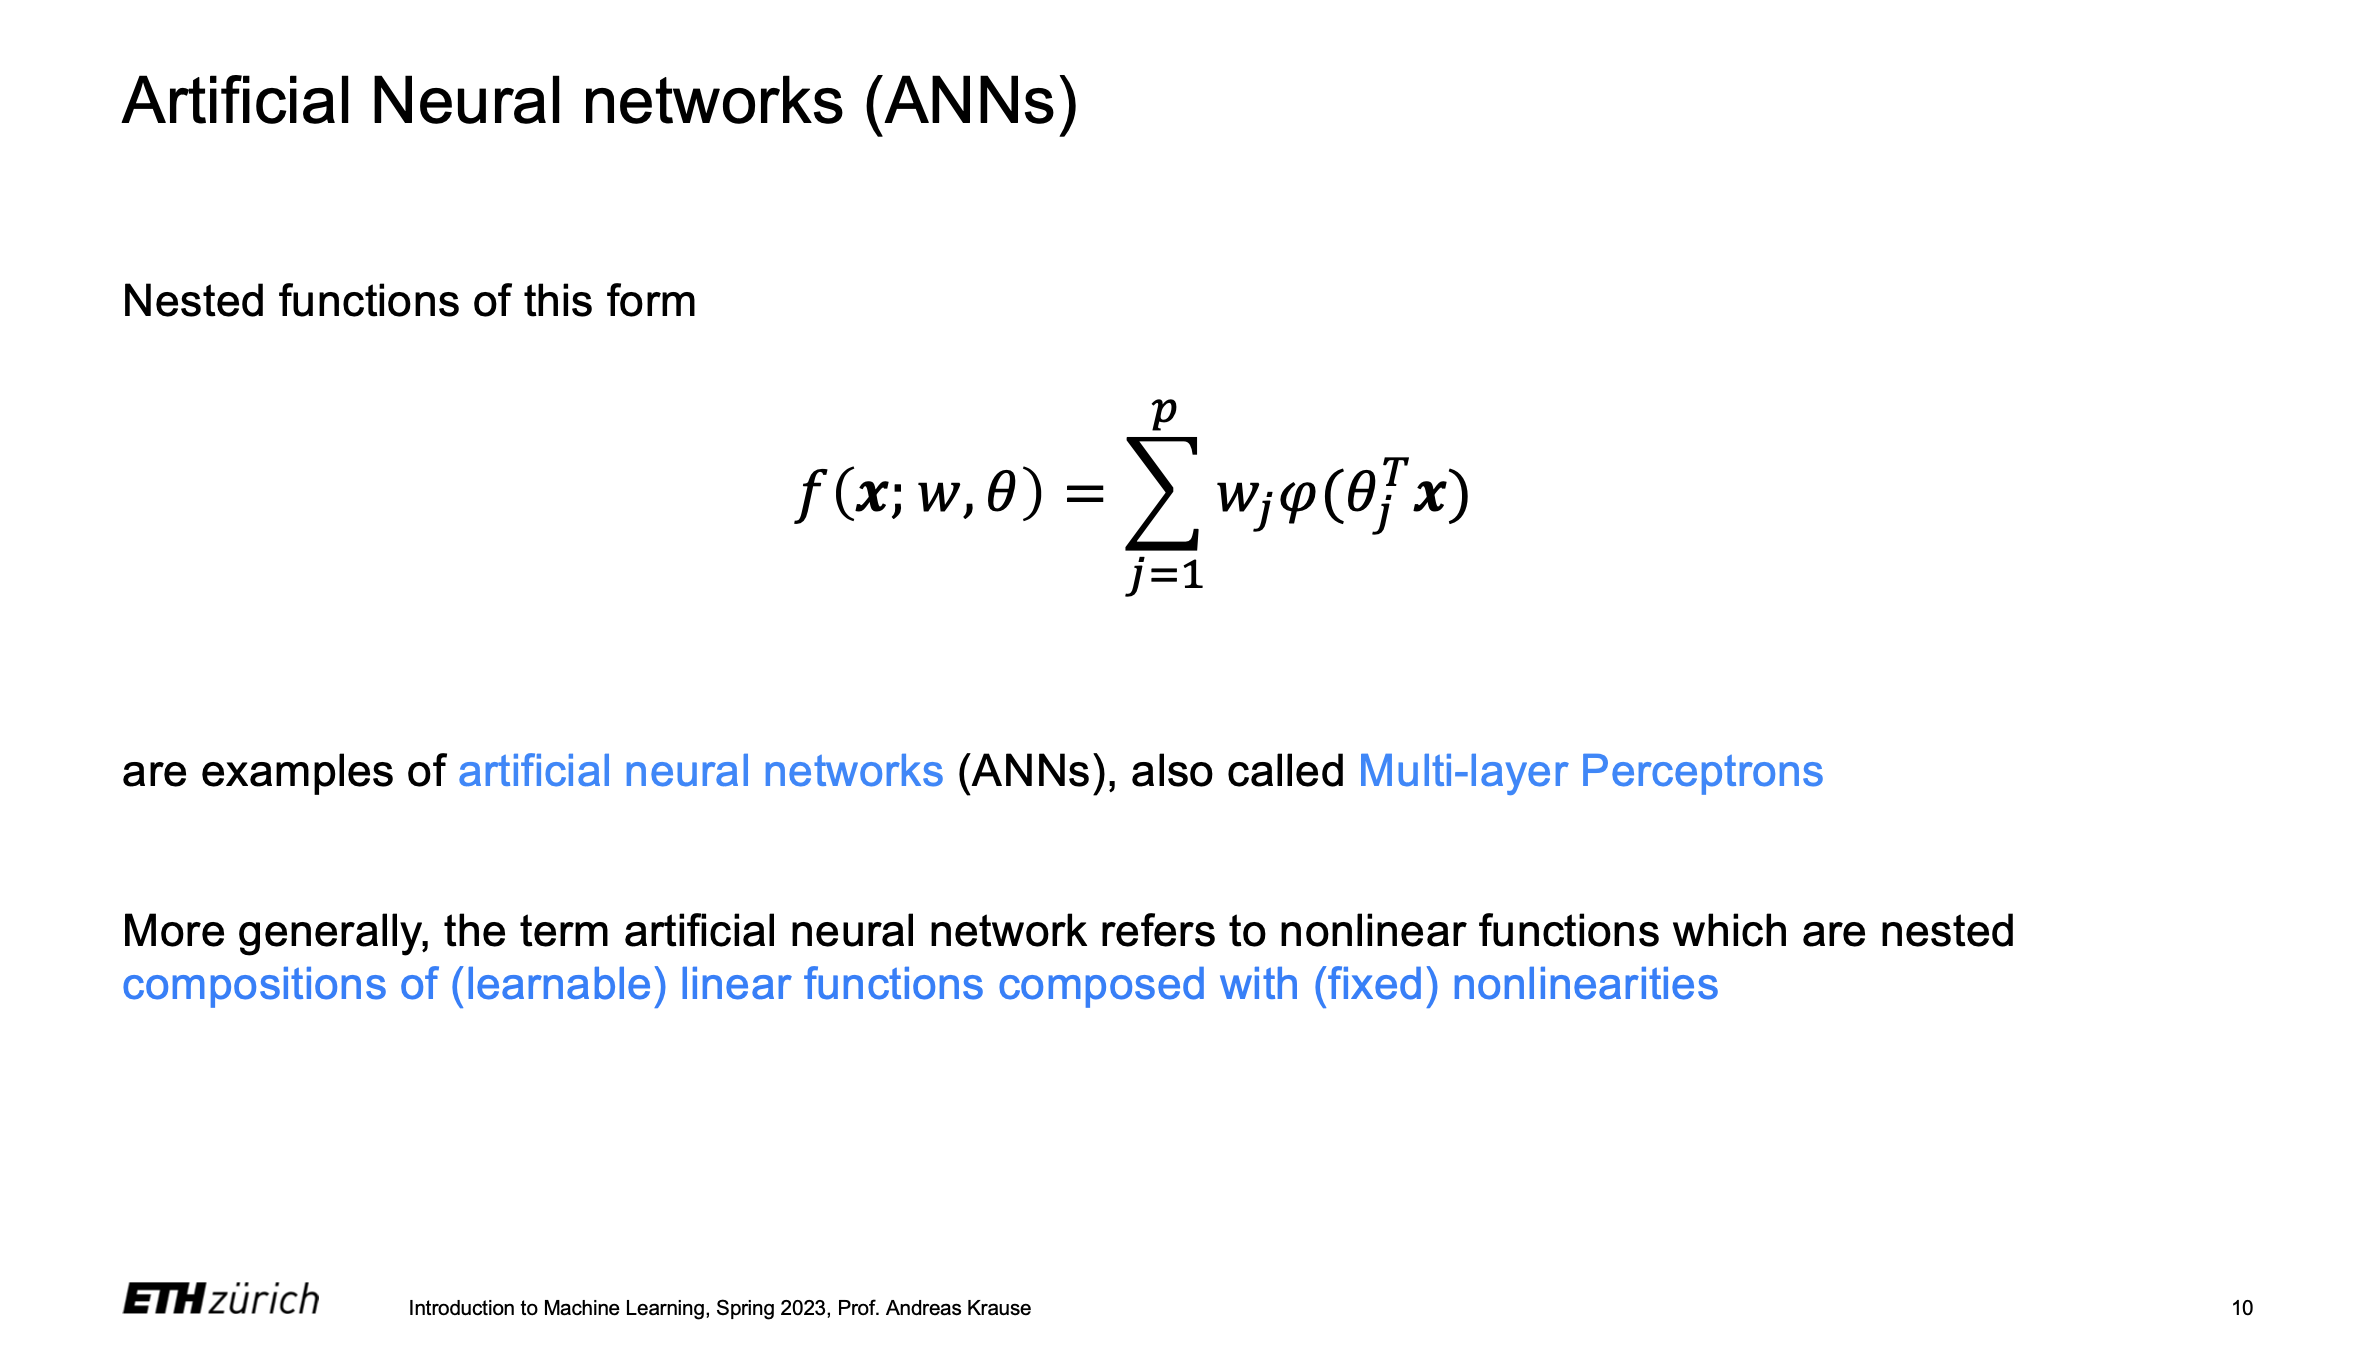

Need:

* Some Data with features $[x_1, ....x_m]$

* Activation Functions Φ

* Loss Function $l$

* Forward Propagation

* Back Propagation

* Training Loop

* Plotting and Analysis tools


In [1]:
import numpy as np
import matplotlib.pyplot as plt

200 200


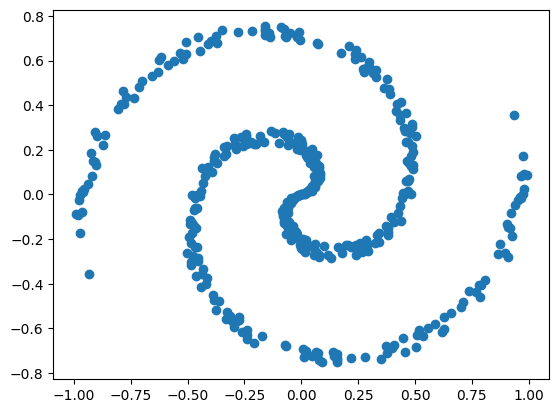

In [5]:
# Data (Two Spirals with lables)
N = 200 # number of data points per spiral
F = 2 # number of features per data point

X = np.zeros((N*F, 2))
y = np.zeros(N*F, dtype='uint8')

r = np.linspace(0, 1, N)
theta = np.linspace(0, 2.0*np.pi, N) + np.random.rand(N)*0.4
print(r.size, theta.size)

X[:N] = np.array([r*np.cos(theta), r*np.sin(theta)]).T
X[N:] = np.array([-r*np.cos(theta), -r*np.sin(theta)]).T
# add second spiral

plt.scatter(X[:, 0], X[:, 1])


In [6]:
# Labels (ground truth)
y[:N] = np.zeros(N)
y[N:] = np.ones(N)
y = y.reshape(2*N, 1)
print('yshape', y.shape)    


yshape (400, 1)


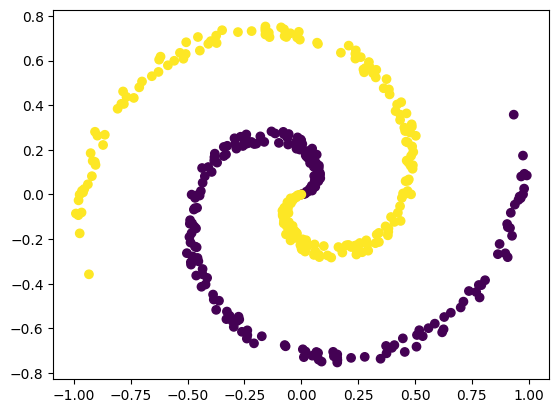

In [7]:
plt.scatter(X[:, 0], X[:, 1],c=y)

In [8]:
# activation function (sigmoid)
def activation(z):
  return 1 / (1 + np.exp(-z))


In [9]:
def d_activation(z):
  return activation(z) * (1-activation(z))

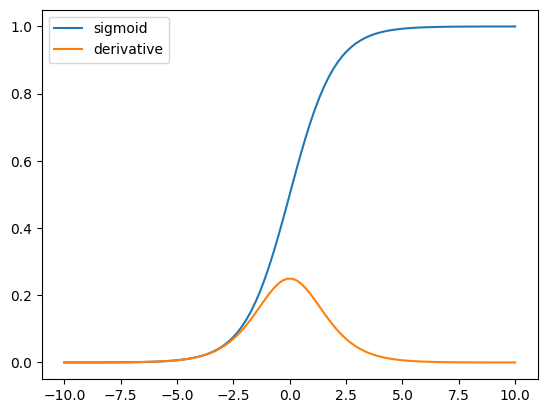

In [10]:
px = np.linspace(-10,10,100)
plt.plot(px, activation(px), label='sigmoid')
plt.plot(px, d_activation(px), label='derivative')
plt.legend(loc='upper left')

In [13]:
# BUILD A MODEL
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# fully connected network
model.add(Dense(10, input_dim = 2, activation='relu'))
# output 
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', metrics=['accuracy'])


2023-04-01 15:21:17.210814: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 15:21:17.326344: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 15:21:17.327601: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 15:21:19.795437: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
model.predict(X)

13/13 [==============================] - 0s 3ms/step


array([[0.5       ],
       [0.49988192],
       [0.49975213],
       [0.4995755 ],
       [0.49950746],
       [0.49944156],
       [0.49930432],
       [0.49921057],
       [0.49910647],
       [0.49901357],
       [0.49879298],
       [0.49878597],
       [0.4987329 ],
       [0.49856216],
       [0.49843612],
       [0.49836734],
       [0.49830225],
       [0.49823362],
       [0.49809793],
       [0.49796456],
       [0.498239  ],
       [0.49784294],
       [0.4976845 ],
       [0.49779594],
       [0.4974997 ],
       [0.49737787],
       [0.4977283 ],
       [0.49838534],
       [0.49766025],
       [0.49817473],
       [0.49768275],
       [0.4981058 ],
       [0.49797827],
       [0.49788454],
       [0.49781096],
       [0.49774176],
       [0.4976838 ],
       [0.49764243],
       [0.497678  ],
       [0.49748662],
       [0.4974243 ],
       [0.49738336],
       [0.49733073],
       [0.49722803],
       [0.49719235],
       [0.49709392],
       [0.4971676 ],
       [0.496

In [16]:
results = model.fit(X, y, epochs=100, batch_size = 10)

Epoch 1/100
40/40 [==============================] - 2s 5ms/step - loss: 0.6767 - accuracy: 0.4025
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 0.6717 - accuracy: 0.4675
Epoch 3/100
40/40 [==============================] - 0s 7ms/step - loss: 0.6673 - accuracy: 0.4950
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 0.6625 - accuracy: 0.5325
Epoch 5/100
40/40 [==============================] - 0s 7ms/step - loss: 0.6582 - accuracy: 0.5325
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 0.6537 - accuracy: 0.5525
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 0.6490 - accuracy: 0.5575
Epoch 8/100
40/40 [==============================] - 0s 7ms/step - loss: 0.6443 - accuracy: 0.5600
Epoch 9/100
40/40 [==============================] - 0s 6ms/step - loss: 0.6398 - accuracy: 0.5675
Epoch 10/100
40/40 [==============================] - 0s 7ms/step - loss: 0.6350 - accuracy: 0.5725
Epoch 11/

In [17]:
model.predict(X)

13/13 [==============================] - 0s 1ms/step


array([[0.5028687 ],
       [0.503599  ],
       [0.50461763],
       [0.50598377],
       [0.5062835 ],
       [0.50555587],
       [0.50696355],
       [0.5071667 ],
       [0.50716865],
       [0.50647855],
       [0.51079386],
       [0.50777227],
       [0.5054173 ],
       [0.50885904],
       [0.5104067 ],
       [0.50827473],
       [0.506608  ],
       [0.5036044 ],
       [0.50674915],
       [0.5081499 ],
       [0.49813738],
       [0.5055293 ],
       [0.50723684],
       [0.49901134],
       [0.50337356],
       [0.50176364],
       [0.49656433],
       [0.4882536 ],
       [0.49515346],
       [0.48034868],
       [0.49271995],
       [0.48660335],
       [0.47729367],
       [0.47296822],
       [0.47007415],
       [0.46763492],
       [0.4685384 ],
       [0.47381416],
       [0.49188933],
       [0.4748294 ],
       [0.45781723],
       [0.45057487],
       [0.50238365],
       [0.47407404],
       [0.46294755],
       [0.48927465],
       [0.4404304 ],
       [0.476

In [18]:
predictions = (model.predict(X) > 0.5).astype("int32")
print(predictions)

13/13 [==============================] - 0s 1ms/step
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [

Text(0.5, 0, 'epoch')

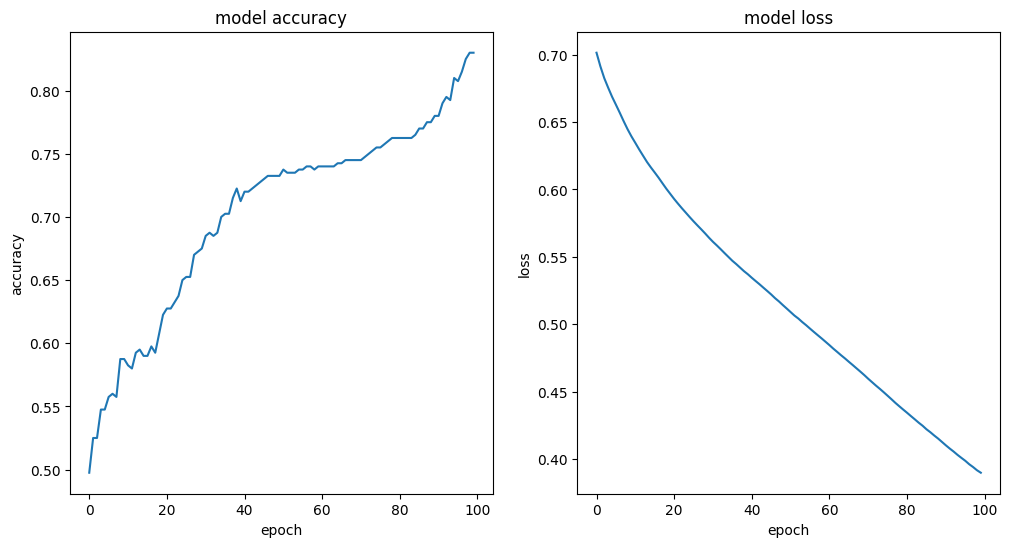

In [ ]:
plt.figure(figsize =(12,6))
# summarize history for accuracy
plt.subplot(121)
plt.plot(results.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')


# summarize history for loss
plt.subplot(122)
plt.plot(results.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')



13/13 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Class boundaries')

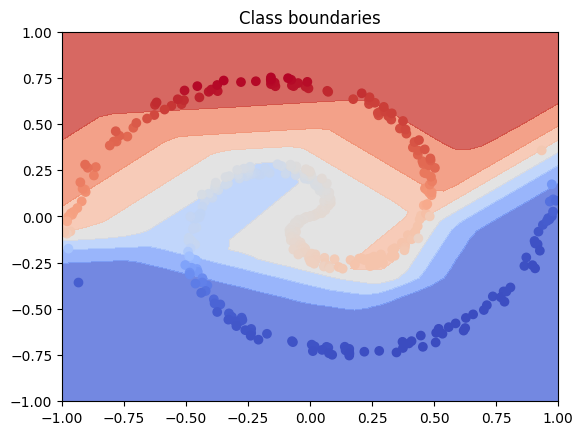

In [19]:
from matplotlib import cm
xx = np.linspace(-1, 1, 40)
yy = np.linspace(-1, 1, 40)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)

prediction_values = model.predict(X)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-1, 1])
axes.set_ylim([-1, 1])

plt.scatter(X[:,0], X[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Class boundaries')



In [20]:
# what else can you do?
# look at the weights and biases in each neuron
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)

# Hidden layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nHidden layer weights",weights1.shape,":\n",weights1)
print("Hidden layer biases",biases1.shape,":\n",biases1)

# Output layer
weights2 = model.layers[2].get_weights()[0]
biases2 = model.layers[2].get_weights()[1]
print("\nOutput layer weights",weights2.shape,":\n",weights2)
print("Output layer biases",biases2.shape,":\n",biases2)

Input layer weights (2, 10) :
 [[ 0.8134098  -0.21580777  0.825098    1.0133343  -0.35079917 -0.28281942
  -1.0780002   1.0082605   0.9475694  -1.2660211 ]
 [ 1.9204473  -1.2215014  -0.36009663 -0.35252956 -1.4416355  -1.6504296
   0.97696733 -0.5583418  -0.56924766  1.4006362 ]]
Input layer biases (10,) :
 [-0.37684363 -0.3084751  -0.38132173 -0.45751    -0.35062504 -0.41752923
  0.4527145  -0.47305545 -0.44945905 -0.587822  ]

Hidden layer weights (10, 1) :
 [[ 2.4488268 ]
 [-2.3303778 ]
 [-2.6196113 ]
 [-2.2040803 ]
 [-1.9583135 ]
 [-2.4834743 ]
 [-0.94031763]
 [-2.2228408 ]
 [-2.6216412 ]
 [ 2.8495107 ]]
Hidden layer biases (1,) :
 [0.4371704]


IndexError: list index out of range

In [ ]:
# HW: 
# compute a forward pass with these weights and biases (don't forget to apply the activation function), 
# plot and see what each neuron does!

In [ ]:
# Part 2: Regression
# GENERAL PIPELINE:
#----------DATA READING
#----------DATA CLEANUP
#----------TRAIN/TEST SPLIT 
#----------MODEL BUILDING
#----------FITTING/TRAINING THE MODEL
#----------MONITOR PROGRESS
#----------EVALUATE
#----------TEST/PREDICT
#----------VERIFY 

In [21]:

import pandas as pd
import seaborn as sns
import tensorflow as tf



#----------DATA READING 
filename = 'https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv'
# read file
csv_data = pd.read_csv(filename, sep=',')


#----------DATA CLEANUP 
# drop bad data
clean_data = csv_data.dropna() 

# normalize the data
norm_data = (clean_data-clean_data.min())/(clean_data.max()-clean_data.min()) 

print(norm_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean       0.476882      0.327867            0.540968      0.069637   
std        0.199718      0.227135            0.246803      0.057465   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.254980      0.147715            0.333333      0.038487   
50%        0.583665      0.181722            0.549020      0.056017   
75%        0.632470      0.550478            0.705882      0.083017   
max        1.000000      1.000000            1.000000      1.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean         0.083552      0.039984      0.082260       0.233354   
std          0.065410      0.032172      0.063233       0.131595   
min          0.000000      0.000000      0.000000       0.000000   
25%          0.04593

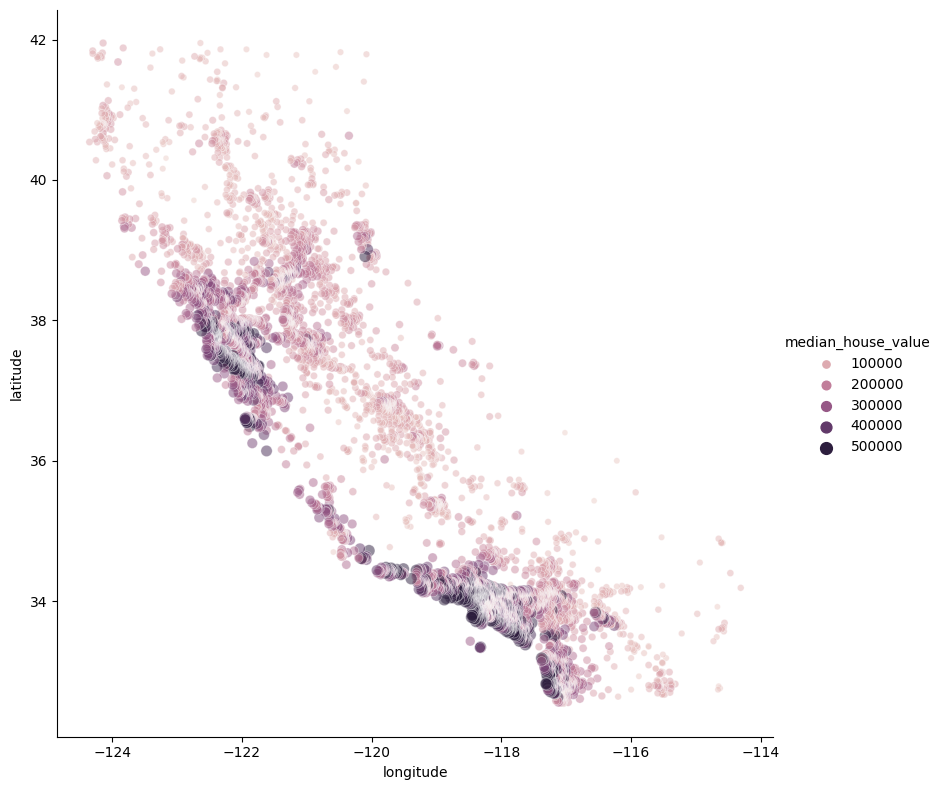

In [22]:
# data visualization
sns.relplot(x='longitude', y='latitude', size='median_house_value', hue='median_house_value', alpha=0.5, height=8, data=csv_data)

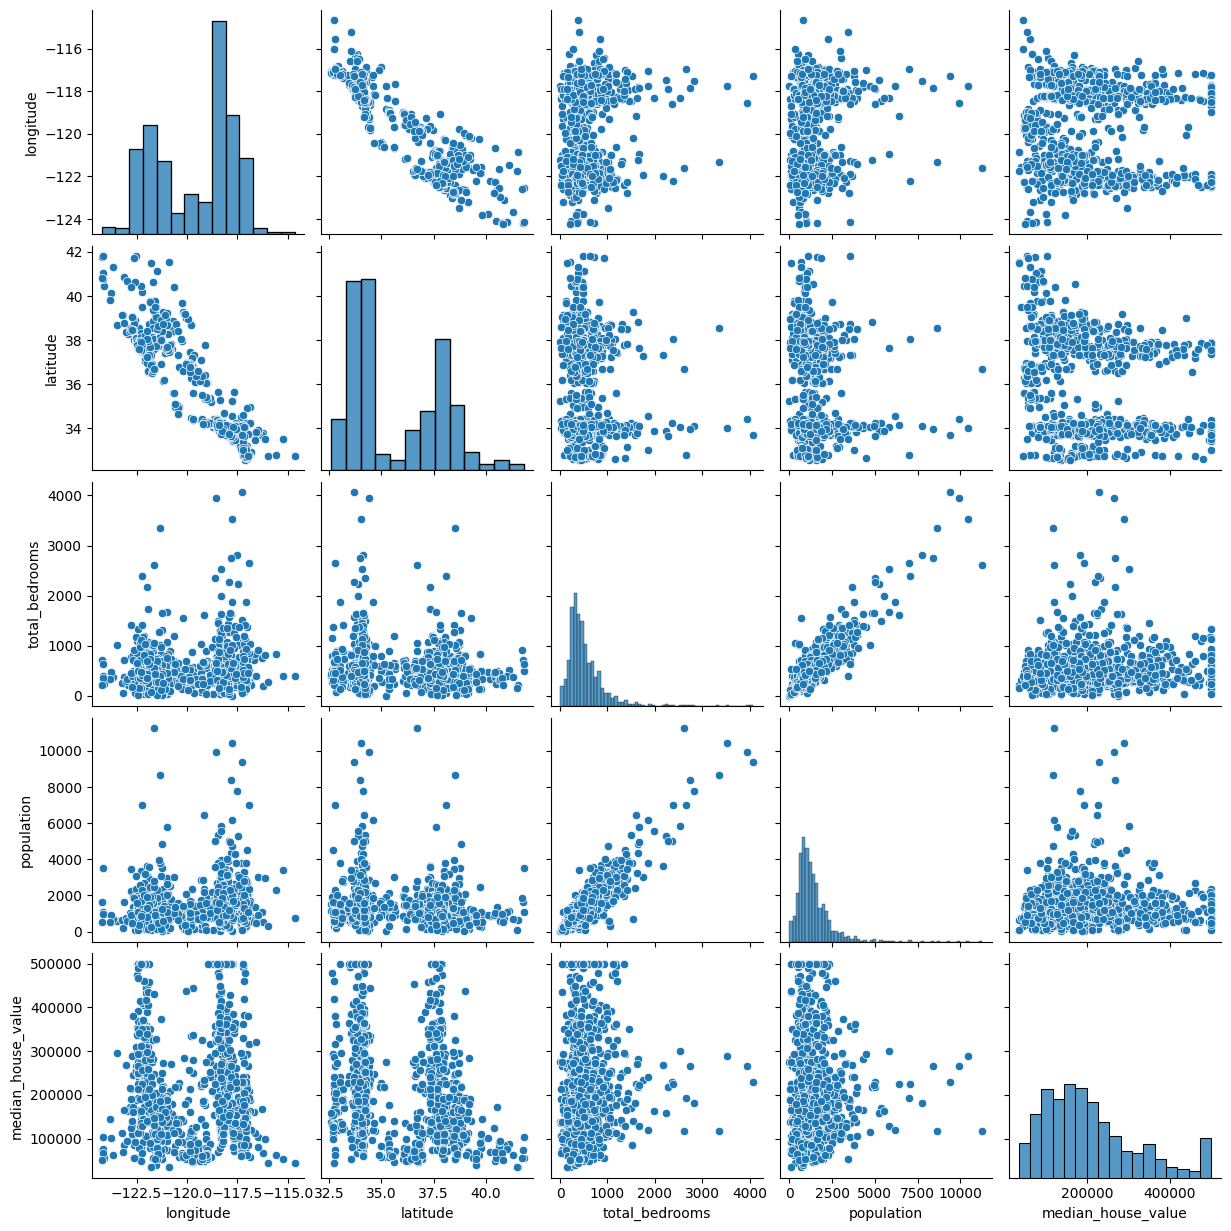

In [ ]:
sns.pairplot(csv_data.sample(n=1000)[['longitude', 'latitude', 'total_bedrooms', 'population', 'median_house_value']])

In [23]:
#----------TRAIN/TEST SPLIT 
train_data = norm_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = norm_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features)
x_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

# separate out the y (results) from x (features)
x_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

Training Data
                       count      mean       std       min       25%       50%  \
longitude           13600.0  0.476903  0.200069  0.004980  0.254980  0.583665   
latitude            13600.0  0.327963  0.227317  0.001063  0.147715  0.181722   
housing_median_age  13600.0  0.543133  0.247076  0.000000  0.333333  0.549020   
total_rooms         13600.0  0.069296  0.057619  0.000000  0.038408  0.055727   
total_bedrooms      13600.0  0.083205  0.065608  0.000000  0.045624  0.066884   
population          13600.0  0.039866  0.031603  0.000000  0.022002  0.032540   
households          13600.0  0.081944  0.063499  0.000000  0.046045  0.066930   
median_income       13600.0  0.232934  0.132296  0.000000  0.141912  0.209059   

                         75%       max  
longitude           0.632470  1.000000  
latitude            0.550478  1.000000  
housing_median_age  0.705882  1.000000  
total_rooms         0.082272  1.000000  
total_bedrooms      0.099783  1.000000  
populatio

In [24]:
print(len(x_train.keys()))

8


In [25]:
#--------MODEL BUILDING
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    # 1 node in the output for the median_house_vale
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              # loss function to minimize
              loss='mse',
              # list of metrics to monitor
              metrics=['mae',])

model.summary()

8
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_01 (Dense)            (None, 32)                288       
                                                                 
 dense_02 (Dense)            (None, 32)                1056      
                                                                 
 Output_Layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# parameters
(8+1)*32
(32+1)*32
(32+1)*1

33

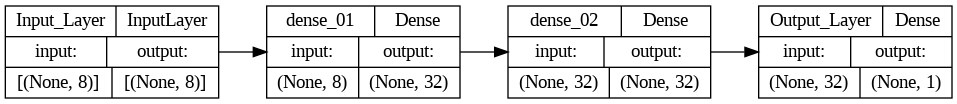

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96,
)

In [26]:
# FIT/TRAIN model on training data
history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20


/home/otps3141/.local/lib/python3.11/site-packages/keras/engine/data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


680/680 [==============================] - 4s 4ms/step - loss: 0.0260 - mae: 0.1192 - val_loss: 0.0205 - val_mae: 0.1018
Epoch 2/20
680/680 [==============================] - 3s 4ms/step - loss: 0.0208 - mae: 0.1048 - val_loss: 0.0191 - val_mae: 0.0961
Epoch 3/20
680/680 [==============================] - 3s 4ms/step - loss: 0.0193 - mae: 0.1004 - val_loss: 0.0171 - val_mae: 0.0944
Epoch 4/20
680/680 [==============================] - 2s 4ms/step - loss: 0.0182 - mae: 0.0972 - val_loss: 0.0167 - val_mae: 0.0941
Epoch 5/20
680/680 [==============================] - 3s 4ms/step - loss: 0.0178 - mae: 0.0958 - val_loss: 0.0162 - val_mae: 0.0915
Epoch 6/20
680/680 [==============================] - 3s 4ms/step - loss: 0.0174 - mae: 0.0945 - val_loss: 0.0169 - val_mae: 0.0985
Epoch 7/20
680/680 [==============================] - 2s 3ms/step - loss: 0.0169 - mae: 0.0933 - val_loss: 0.0151 - val_mae: 0.0866
Epoch 8/20
680/680 [==============================] - 3s 4ms/step - loss: 0.0165 - mae:

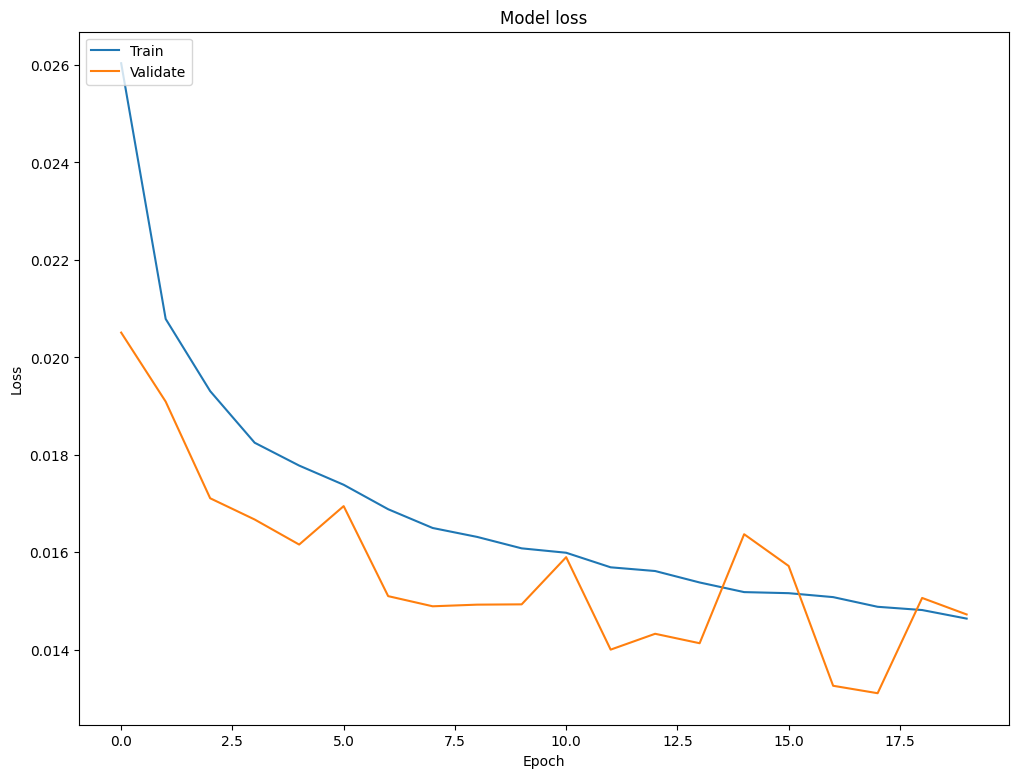

In [27]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [28]:
#--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)

107/107 - 0s - loss: 0.0159 - mae: 0.0925 - 271ms/epoch - 3ms/step
Loss: 0.015852950513362885 MAE: 0.09250728785991669


In [31]:
#--------PREDICT
p_test = model.predict(x_test)

107/107 [==============================] - 0s 2ms/step


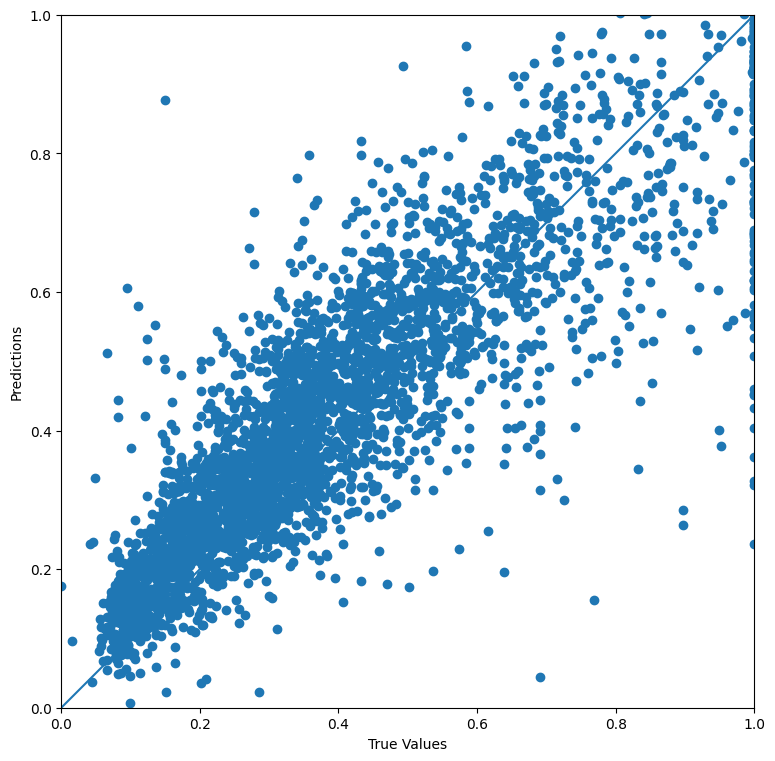

In [32]:
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

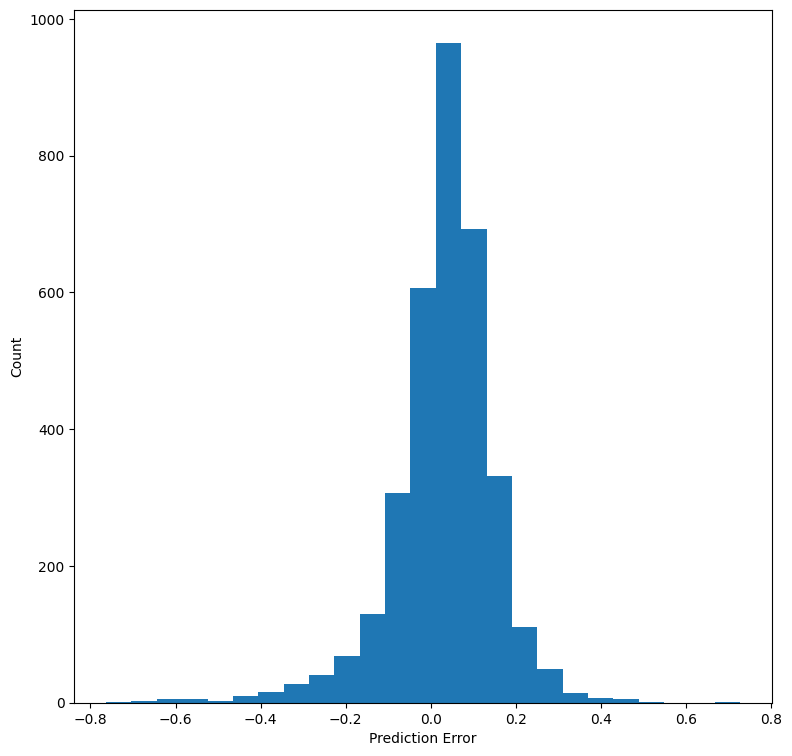

In [33]:
#---------PLOT the distribution of errors
fig = plt.figure(figsize=(9,9))
error = p_test.flatten() - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()